# Crawl Images From Website With ASPX Structure -- Google Images
## **IMPORTANT: This projects is 100% done by Max, Hong Ka Ho to apply the web-scraping techniques in real life. Codes here should not be used as commercial purposes like reselling the pictures after crawling since it may violate the copyright of the photos' owner**

## What is ASPX websites?

### In lamen terms, ASPX websites are the websites that load the data on requests but the url itself would not change. The most common ASPX websites are Facebook, Google Images, Instagram, Twitter, etc. When we scroll down to the bottom of the websites, the websites will automatically update the HTML code inside and display the new contents to us on requests.

### With this feature, web-crawling of the ASPX structure becomes immensely difficult since it is not stationary which allows me to analyze the code completely beforehand and requires the scrolling process to update our HTML code consistently. On the other hand, it is not always easy to find some patterns for each updates in XHR area. Although the code is not quite long, it takes me 3-4 hours studying the structure of the google image webpage and use several hours to contemplate a useful technique to solve the ASPX structure problems finally another several hours to code it out + write it in report.

## What is our protagonist this time?
### In this project, I would demonstrate how we can web-scrape the images from a renowned image search engine - Google Images. And I have chosen the birds categories 
(https://www.google.com/search?q=birds&newwindow=1&sxsrf=ALeKk01iOOy1dOJSKn4V7MabCoHONbzkGQ:1597387388905&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi_lonfi5rrAhXCMN4KHRrhAJUQ_AUoAXoECBwQAw&biw=1707&bih=838&dpr=1.13#imgrc=_kEsU0Y9829mQM )

### It should take something similar as the followings:
![bird](bird.png)

## Step 1: Use Selenium to mimic a Google Chrome object

In [1]:
#import selenium library
from selenium import webdriver

In [2]:
#create google chrome object
driver = webdriver.Chrome()

### The object will pop out as the following blank sheet:
![driver](chromedriver.png)

In [3]:
#link the driver object to the google image searching birds
url = 'https://www.google.com/search?q=birds&newwindow=1&sxsrf=ALeKk01iOOy1dOJSKn4V7MabCoHONbzkGQ:1597387388905&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi_lonfi5rrAhXCMN4KHRrhAJUQ_AUoAXoECBwQAw&biw=1707&bih=838&dpr=1.13'
driver.get(url)

### The mimic driver has gone to the google images webpage:
![drivebird](driver_to_google.png)

## Step 2: Set up the code to ask the driver object to scroll down automatically to update the webpage

### You may take a look at the outcome of this part through this link: https://drive.google.com/file/d/1pVmOp6UO3CgbV2s35Fl28CPUPDlA32Og/view?usp=sharing

In [4]:
#find the height of the driver
last_height = driver.execute_script('return document.body.scrollHeight')
last_height

2272

In [25]:
import time
new_height = 0
#set the waiting time
pause_time = 2
while True:
    #ask the driver to scroll to the current avaliable bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #wait for 2 seconds so that the webpage can load something new
    time.sleep(pause_time)
    new_height = driver.execute_script('return document.body.scrollHeight')
    #driver may pop out the 'show more results button'
    
    #If the scrolling bar doesn't move anymore, then ends the program
    if new_height == last_height: 
        #driver may pop out the 'show more results button', so first try to click on it
        try:
            driver.find_element_by_xpath('//*[@id="islmp"]/div/div/div/div/div[5]/input').click()
        #if it there isn't any relevant buttons, then end the loops
        except:
            break
    #set the new to lasheight
    last_height = new_height
print('Finished Scrolling')

Finished Scrolling


### Within a minute, we successfully scroll the google images to the end of the pages
![end](end.png)

## Step 3: Try to capture the Img from the HTML code from BeautifulSoup

### After analysing the code, we find that the img is lying in the class "rg_i Q4LuWd"
![img_pos](img_pos.png)

In [36]:
#get the html code from the driver
from bs4 import BeautifulSoup
sp = BeautifulSoup(driver.page_source, 'html.parser')

[<img alt="Bird populations in US and Canada down 3bn in 50 years - BBC News" class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="678.3500000601634" height="180" jsname="Q4LuWd" src="" width="320"/>,
 <img alt="Guide to North American Birds | Audubon" class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="678.3999999752268" height="189" jsname="Q4LuWd" src="" width="288"/>,
 <img alt="Bird Pictures &amp; Facts" class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="681.2449999852106" height="192" jsname="Q4LuWd" src="" width="287"/>,
 <img alt="Climate Change Linked to Shrinking Bird Sizes: Study | The ..." class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="681.3400000100955" height="180" jsname="Q4LuWd" src="" width="450"/>,
 <img alt="15 Amazing Facts About 15 Birds | Mental Floss" class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="681.4000000013039" height="180" jsname="Q4LuWd" src="" width="322"/>,
 <img alt="Newly discovered 
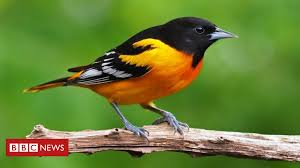
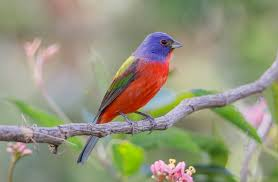
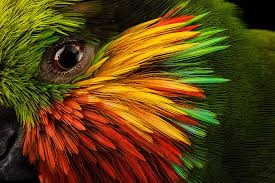
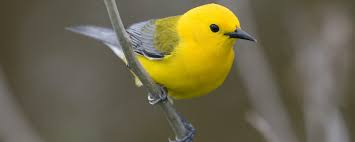
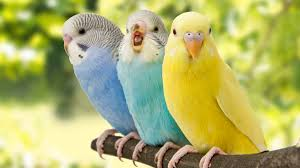
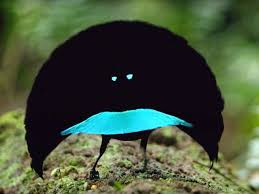
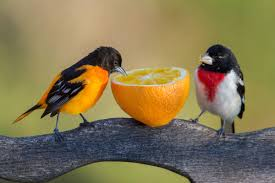
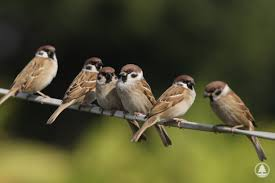
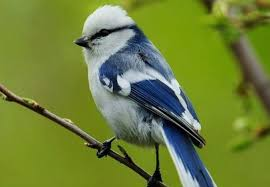
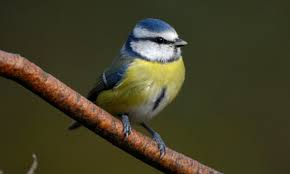
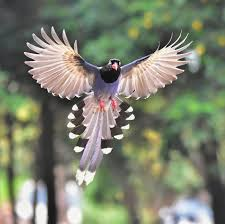
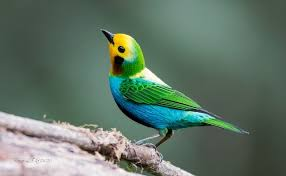
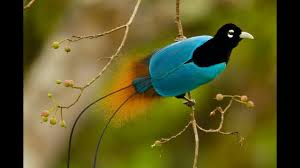
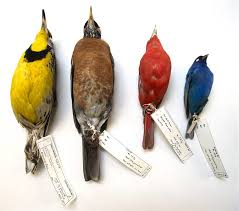
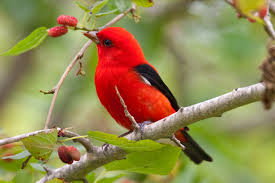
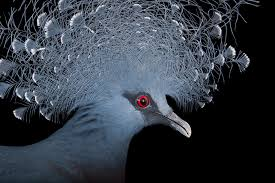
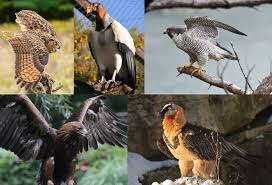
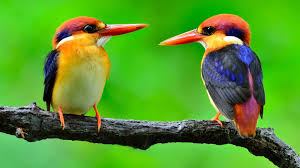
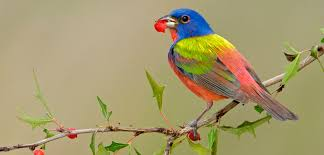
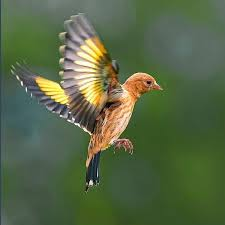

In [37]:
#extract all the codes with class = 'rg_i Q4LuWd'
codes = sp.find_all('img', class_ = 'rg_i Q4LuWd')
codes

### Finally, we need to create a for loop to separately handle the image links since there are mainly 2 categories: 1. HTML type images 2. Base64 images. Therefore, we need to check the nature of the images and assign suitable decode method so that we could successfully save images to our designated position

In [53]:
#Create the directory
import base64
import requests
import os

image_dir = 'Birds/'
n = 1
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

#Create for loop to read all the files in the google images
for code in codes:
    image = code.get('src')
    #data which is base 64 format
    
    if image == None:
        continue
    elif image[:4] == 'data':
        #decode the images with base64
        imgdata = base64.b64decode(image[23:])
        filename = str(n) + '.jpg'  
        full_path = os.path.join(image_dir, filename)
        with open(full_path, 'wb') as f:
            f.write(imgdata)
        print(str(n) + '.jpg Download Complete')
        n += 1
    elif image[:5] == 'https':
        imgfile = requests.get(image)
        filename = str(n) + '.jpg' 
        full_path = os.path.join(image_dir, filename)
        with open(full_path, 'wb') as f:
            f.write(imgfile.content)
        print(str(n) + '.jpg Download Complete')
        n += 1
print('There are in total {} pictures download'.format(n))

1.jpg Download Complete
2.jpg Download Complete
3.jpg Download Complete
4.jpg Download Complete
5.jpg Download Complete
6.jpg Download Complete
7.jpg Download Complete
8.jpg Download Complete
9.jpg Download Complete
10.jpg Download Complete
11.jpg Download Complete
12.jpg Download Complete
13.jpg Download Complete
14.jpg Download Complete
15.jpg Download Complete
16.jpg Download Complete
17.jpg Download Complete
18.jpg Download Complete
19.jpg Download Complete
20.jpg Download Complete
21.jpg Download Complete
22.jpg Download Complete
23.jpg Download Complete
24.jpg Download Complete
25.jpg Download Complete
26.jpg Download Complete
27.jpg Download Complete
28.jpg Download Complete
29.jpg Download Complete
30.jpg Download Complete
31.jpg Download Complete
32.jpg Download Complete
33.jpg Download Complete
34.jpg Download Complete
35.jpg Download Complete
36.jpg Download Complete
37.jpg Download Complete
38.jpg Download Complete
39.jpg Download Complete
40.jpg Download Complete
41.jpg Do

322.jpg Download Complete
323.jpg Download Complete
324.jpg Download Complete
325.jpg Download Complete
326.jpg Download Complete
327.jpg Download Complete
328.jpg Download Complete
329.jpg Download Complete
330.jpg Download Complete
331.jpg Download Complete
332.jpg Download Complete
333.jpg Download Complete
334.jpg Download Complete
335.jpg Download Complete
336.jpg Download Complete
337.jpg Download Complete
338.jpg Download Complete
339.jpg Download Complete
340.jpg Download Complete
341.jpg Download Complete
342.jpg Download Complete
343.jpg Download Complete
344.jpg Download Complete
345.jpg Download Complete
346.jpg Download Complete
347.jpg Download Complete
348.jpg Download Complete
349.jpg Download Complete
350.jpg Download Complete
351.jpg Download Complete
352.jpg Download Complete
353.jpg Download Complete
354.jpg Download Complete
355.jpg Download Complete
356.jpg Download Complete
357.jpg Download Complete
358.jpg Download Complete
359.jpg Download Complete
360.jpg Down

640.jpg Download Complete
641.jpg Download Complete
642.jpg Download Complete
643.jpg Download Complete
644.jpg Download Complete
645.jpg Download Complete
646.jpg Download Complete
647.jpg Download Complete
648.jpg Download Complete
649.jpg Download Complete
650.jpg Download Complete
651.jpg Download Complete
652.jpg Download Complete
653.jpg Download Complete
654.jpg Download Complete
655.jpg Download Complete
656.jpg Download Complete
657.jpg Download Complete
658.jpg Download Complete
659.jpg Download Complete
660.jpg Download Complete
661.jpg Download Complete
662.jpg Download Complete
663.jpg Download Complete
664.jpg Download Complete
665.jpg Download Complete
666.jpg Download Complete
667.jpg Download Complete
668.jpg Download Complete
669.jpg Download Complete
670.jpg Download Complete
671.jpg Download Complete
672.jpg Download Complete
673.jpg Download Complete
674.jpg Download Complete
675.jpg Download Complete
676.jpg Download Complete
677.jpg Download Complete
678.jpg Down

### With no wonder, my program successfully assists me to crawl all the pictures in the google images to my Birds file and each one is assigned with a name according to their download order
![result](results.png)